In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [0]:
import cifar10
import matplotlib.pyplot as plt

In [0]:
cifar10.data_path = "data/CIFAR-10/"

In [6]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [7]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [0]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [10]:
images_train.shape,images_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [11]:
cls_train,cls_test

(array([6, 9, 9, ..., 9, 1, 1]), array([3, 8, 8, ..., 5, 1, 7]))

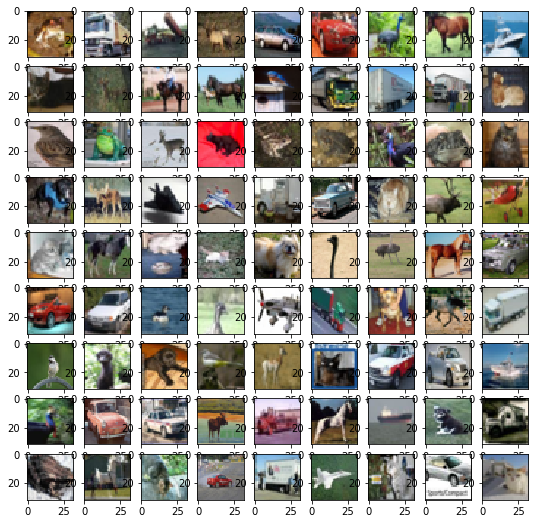

In [12]:
fig = plt.figure(figsize=(9,9))
for i in range(81):
    ax = fig.add_subplot(9,9,i+1)
    ax.imshow(images_train[i], cmap=plt.cm.bone)
plt.show()

In [13]:
image_no,image_x,image_y,image_z = images_train.shape
images_2d = images_train.reshape(image_no,image_x*image_y*image_z)
images_2d.shape

(50000, 3072)

In [14]:
pca = PCA()
pca.fit(images_2d)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
k = 0
total = 0
while total < 0.995:
    total += pca.explained_variance_ratio_[k]
    k += 1
k

891

In [16]:
pca_cifar10 = PCA(n_components = k)
images_2d_transform = pca_cifar10.fit_transform(images_2d)
images_2d_transform.shape

(50000, 891)

In [17]:
image_2d_approx = pca_cifar10.inverse_transform(images_2d_transform)
image_2d_approx.shape

(50000, 3072)

In [18]:
image_no,image_x,image_y,image_z = images_test.shape
images_2d_test = images_test.reshape(image_no,image_x*image_y*image_z)
images_2d_test.shape

(10000, 3072)

In [19]:
images_2d_test_transform = pca_cifar10.transform(images_2d_test)
images_2d_test_transform.shape

(10000, 891)

In [20]:
clf1 = RandomForestClassifier()
clf1.fit(images_2d_transform,cls_train)
y_pred = clf1.predict(images_2d_test_transform)
print(classification_report(cls_test,y_pred))
print(confusion_matrix(cls_test,y_pred))
print("Score",clf1.score(images_2d_test_transform,cls_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.23      0.38      0.29      1000
           1       0.22      0.29      0.25      1000
           2       0.17      0.23      0.20      1000
           3       0.16      0.18      0.17      1000
           4       0.23      0.23      0.23      1000
           5       0.18      0.16      0.17      1000
           6       0.25      0.17      0.20      1000
           7       0.23      0.14      0.18      1000
           8       0.37      0.28      0.32      1000
           9       0.29      0.18      0.22      1000

    accuracy                           0.22     10000
   macro avg       0.23      0.22      0.22     10000
weighted avg       0.23      0.22      0.22     10000

[[384  79 102  67  67  55  28  51 121  46]
 [135 291  72  92  49  62  60  63  59 117]
 [165  74 230 114 155  81  74  40  43  24]
 [142 111 145 182  92 119  61  62  49  37]
 [124  77 183 108 234  66 102  45  39  22]
 [142 105 155 162  87 157 

In [0]:
np.savetxt('pred.csv',labels_test, delimiter=',', fmt="%s")